# ECG Arrythmia Classification

The data [MIT-BIH arrhythmia data](https://www.physionet.org/physiobank/database/mitdb/) is taken from [kaggle](https://www.kaggle.com/shayanfazeli/heartbeat).

Self-Link to the GitHub Repository for this project: [Link](https://github.com/Revati-N/ECG_Arrhythmia_Classification)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
trainpath = "Dataset/mitbih_train.csv"
x_train = pd.read_csv(trainpath,header=None,usecols=range(187))
y_train = pd.read_csv(trainpath,header=None,usecols=[187]).iloc[:,0]
x_train.shape

(87554, 187)

In [23]:
testpath = "Dataset/mitbih_test.csv"
x_test = pd.read_csv(testpath,header=None,usecols=range(187))
y_test = pd.read_csv(testpath,header=None,usecols=[187]).iloc[:,0]
x_test.shape

(21892, 187)

In [24]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotting

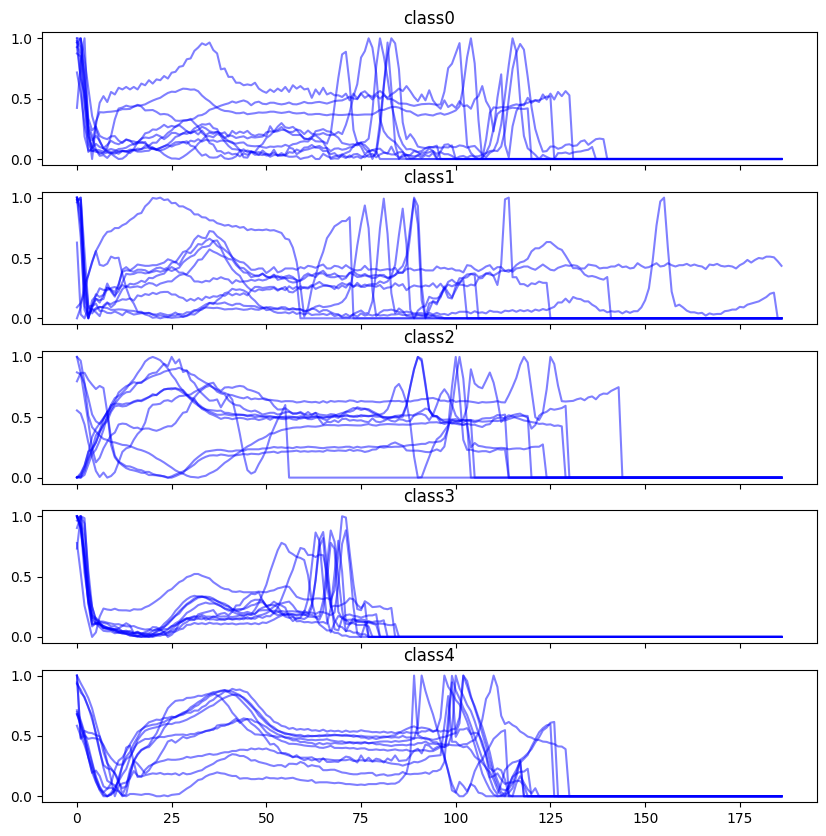

In [25]:
def plot(x_data, y_data, classes=range(5), plots_per_class=10):

    f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(10,10))
    for i in classes:
        for j in range(plots_per_class):
            ax[i].set_title("class{}".format(i))
            ax[i].plot(x_data[y_data == i].iloc[j,:], color="blue", alpha=.5)
            
plot(x_train, y_train)

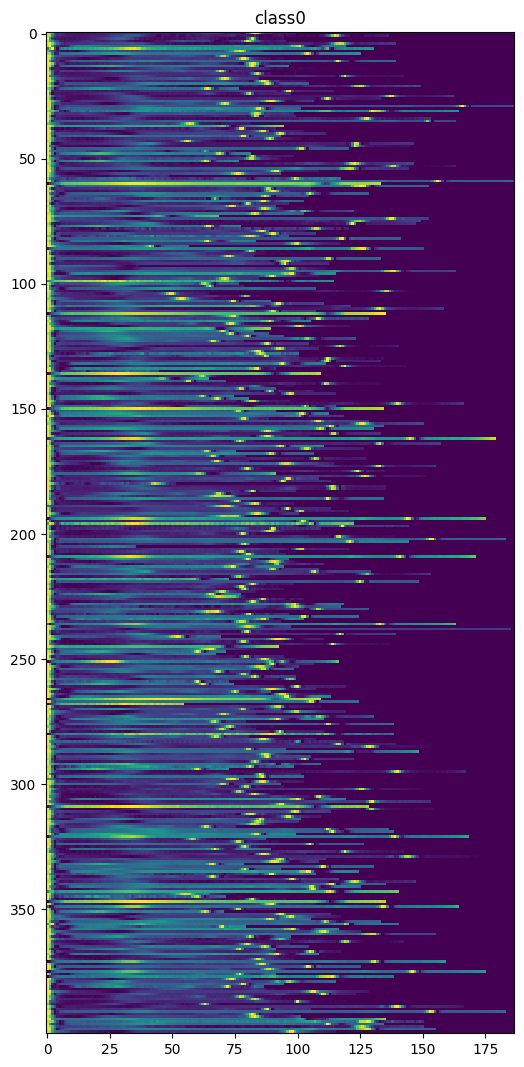

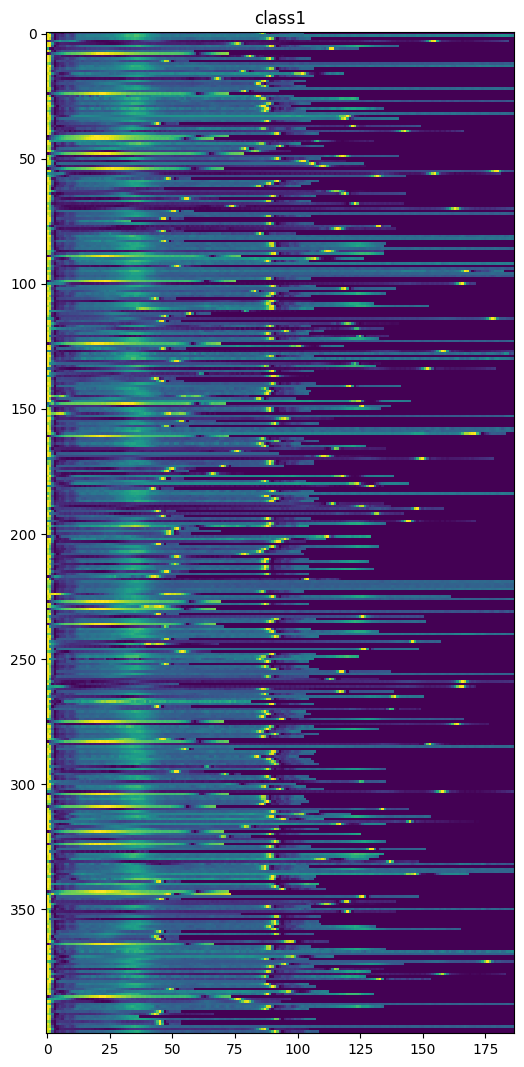

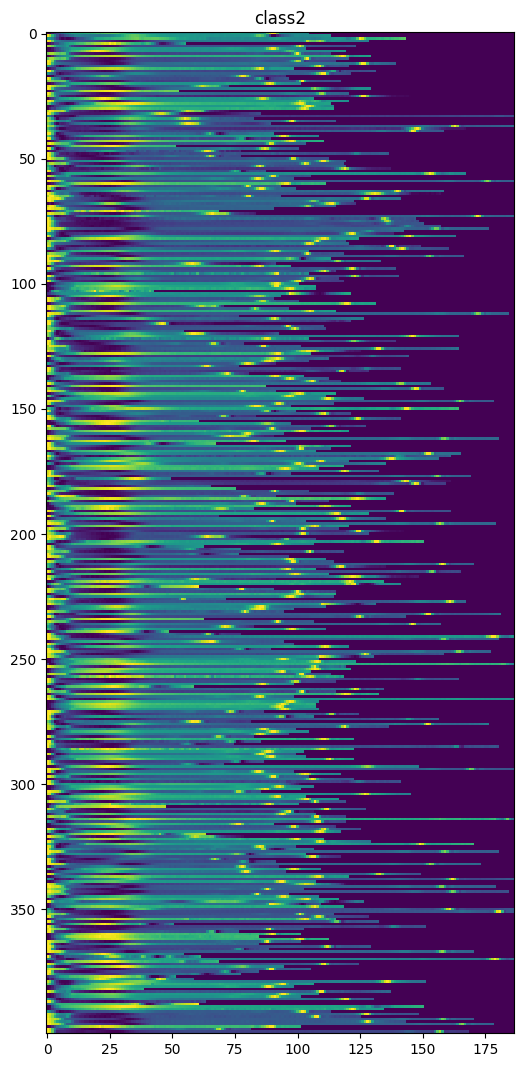

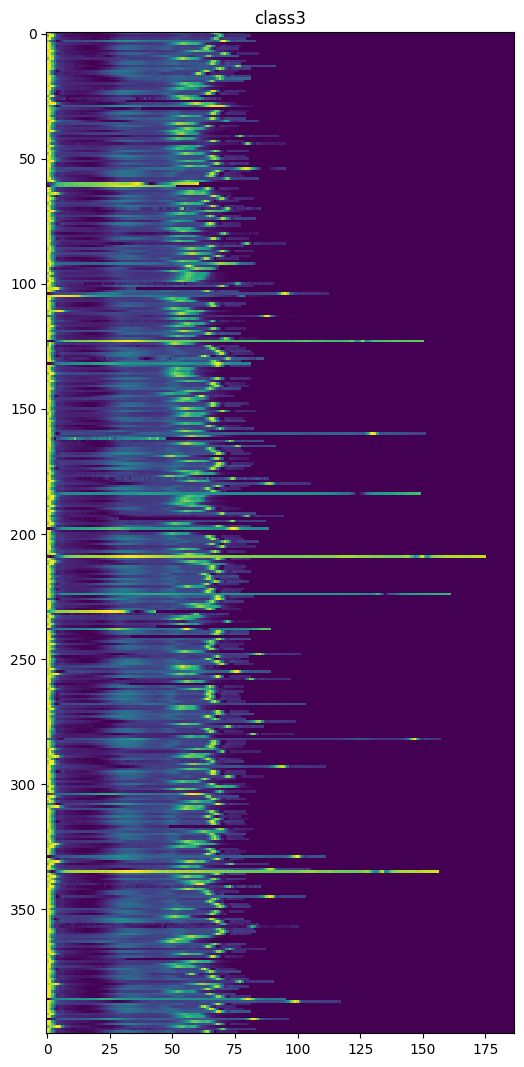

In [6]:
def class_spe(data, classnumber, n_samples):

    fig = plt.figure(figsize=(10,13))
    if type(data)==pd.DataFrame:        
        plt.imshow(data[y_train==classnumber].iloc[:n_samples,:], 
               cmap="viridis", interpolation="nearest")
    else:
        plt.imshow(data[y_train==classnumber][:n_samples,:], 
               cmap="viridis", interpolation="nearest")
    plt.title("class{}".format(classnumber))
    plt.show()
    
for i in range(4):
    class_spe(x_train, i, 400)

Distribution of dataset in classes

<Axes: title={'center': 'y_train'}, xlabel='187'>

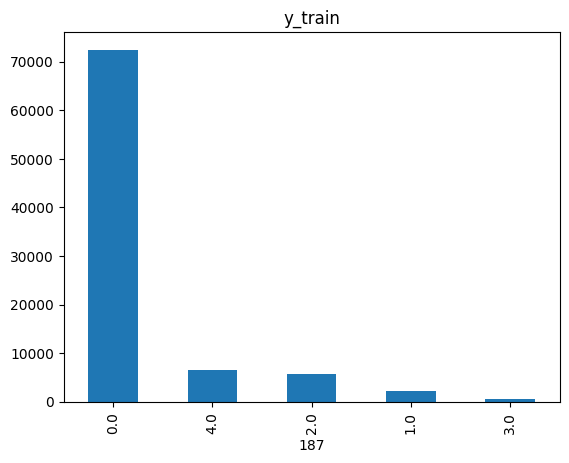

In [7]:
y_train.value_counts().plot(kind="bar", title="y_train")

The class encoding has the following meaning:

| class |heart condition |
|---|---|
| 0  |  Normal, Left/Right bundle branch block, Atrial escape, Nodal escape|   
| 1  | Atrial premature, Aberrant atrial premature, Nodal premature, Supra-ventricular premature  | 
| 2  | Premature ventricular contraction, Ventricular escape  |  
| 3  | Fusion of ventricular and norma  |  
| 4  | Paced, Fusion of paced and normal, Unclassifiable  |  

<Axes: title={'center': 'y_test'}, xlabel='187'>

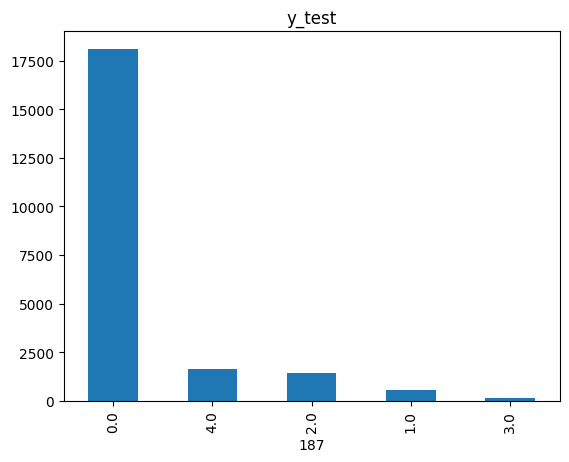

In [8]:
y_test.value_counts().plot(kind="bar", title="y_test")

**Pre-Processing**

In [26]:
from scipy.signal.windows import gaussian
from scipy.signal import decimate  # if you still need it
from scipy.sparse import csr_matrix


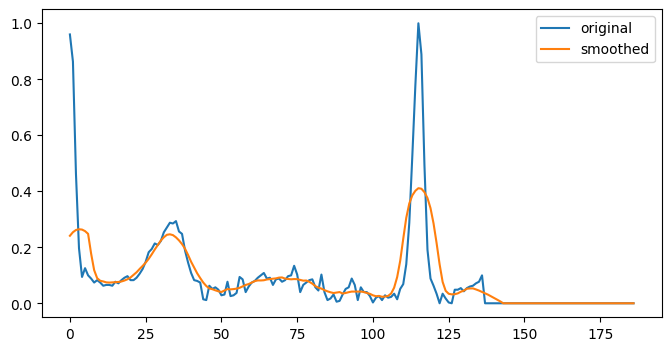

In [27]:
def gaussian_smoothing(data, window, std):
    gauss = gaussian(window ,std, sym=True)
    data = np.convolve(gauss/gauss.sum(), data, mode='same')
    return data

def gauss_wrapper(data):
    return gaussian_smoothing(data, 12, 7)

fig = plt.figure(figsize=(8,4))
plt.plot(x_train.iloc[1,:], label="original")
plt.plot(gauss_wrapper(x_train.iloc[1,:]), label="smoothed")
plt.legend()

In [28]:
def gradient(data, normalize=True):
    data = data.diff(axis=1, periods=3)
    if normalize:
        data = data.apply(lambda x: x/x.abs().max(), axis=1)
    return data

def preprocess(data): 
    data = data.abs().rolling(7, axis=1).max()
    data = data.fillna(method="bfill",axis=1)
    #data = np.apply_along_axis(gauss_wrapper, 1, data)
    data = decimate(data, axis=1, q=5)
    data[np.abs(data) < .05] = 0
    return pd.DataFrame(data)

x_train_grad = gradient(x_train)
x_test_grad = gradient(x_test)

x_train_preprocessed = preprocess(pd.concat([x_train, x_train_grad, gradient(x_train_grad)], axis=1))
x_test_preprocessed = preprocess(pd.concat([x_test, x_test_grad, gradient(x_test_grad)], axis=1))

C:\Users\revna\AppData\Local\Temp\ipykernel_8612\775147533.py:8: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  data = data.abs().rolling(7, axis=1).max()
C:\Users\revna\AppData\Local\Temp\ipykernel_8612\775147533.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="bfill",axis=1)
C:\Users\revna\AppData\Local\Temp\ipykernel_8612\775147533.py:8: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  data = data.abs().rolling(7, axis=1).max()
C:\Users\revna\AppData\Local\Temp\ipykernel_8612\775147533.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="bfill",axis=1)


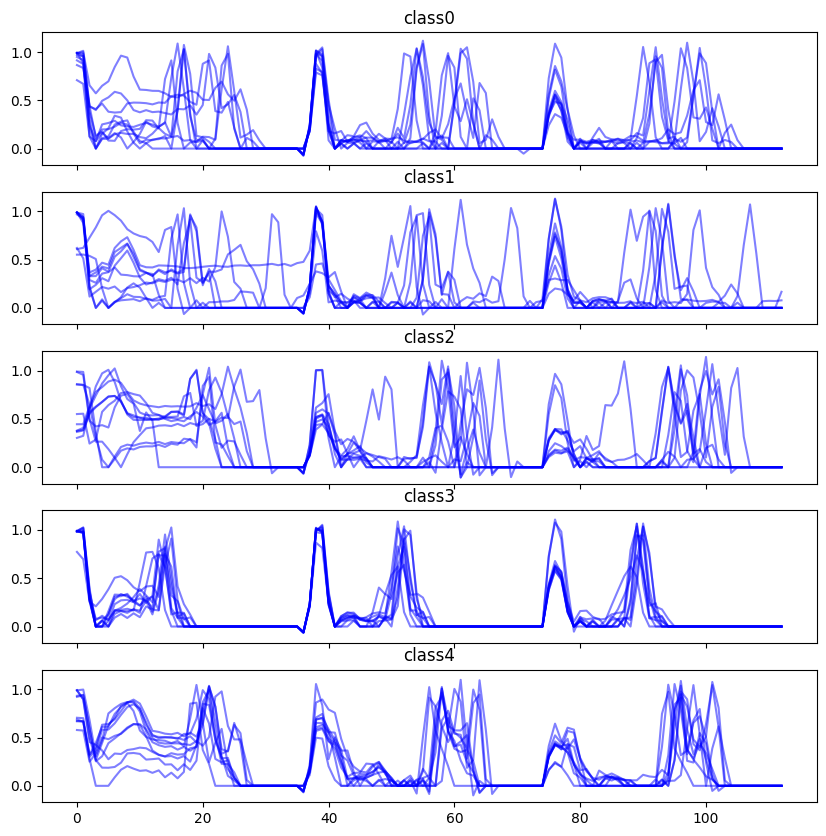

In [29]:
plot(x_train_preprocessed, y_train)

In [30]:
x_train_sparse = csr_matrix(x_train_preprocessed)
x_test_sparse = csr_matrix(x_test_preprocessed)

# Modeling

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(y_true, y_pred):
    print("Model Evaluation")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")


**Logistic Regression**

In [15]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [16]:
model = LogisticRegression(multi_class="ovr",solver="newton-cg", class_weight="balanced", n_jobs=2, max_iter=150, C=.5)

start_time = time.time()
model.fit(x_train_sparse,y_train)
print("training time {}".format(time.time()-start_time))

C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


training time 5.3886919021606445


In [17]:
y_predict = model.predict(x_test_preprocessed)

In [18]:
# Logistic Regression Evaluation
evaluate_model(y_test, y_predict)

Model Evaluation
Accuracy  : 0.8833
Precision : 0.9320
Recall    : 0.8833
F1 Score  : 0.9023


**Support Vector Machines**

In [19]:
from sklearn.svm import LinearSVC
import time

model = LinearSVC(class_weight='balanced', C=1.0, max_iter=1000, dual=False)  

start_time = time.time()
model.fit(x_train_sparse, y_train)
print("training time {}".format(time.time() - start_time))

y_predict = model.predict(x_test_preprocessed)
evaluate_model(y_test, y_predict)


training time 26.31241536140442
Model Evaluation
Accuracy  : 0.9390
Precision : 0.9456
Recall    : 0.9390
F1 Score  : 0.9417


**Random Forests**

In [33]:
# Convert sparse matrix to dense
x_train_dense = x_train_sparse.toarray()

# Convert DataFrame to NumPy array
x_test_dense = x_test_preprocessed.values

In [34]:
from sklearn.ensemble import RandomForestClassifier
import time

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

start_time = time.time()
model.fit(x_train_dense, y_train)
print("training time {}".format(time.time() - start_time))

y_predict = model.predict(x_test_dense)
evaluate_model(y_test, y_predict)


training time 7.942930221557617
Model Evaluation
Accuracy  : 0.9732
Precision : 0.9732
Recall    : 0.9732
F1 Score  : 0.9714


**ANN (MLP)**

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Your evaluate_model function
def evaluate_model(y_true, y_pred):
    print("\nModel Evaluation")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Convert sparse input to dense
x_train_dense = x_train_sparse.toarray()
x_test_dense = x_test_preprocessed.values

# Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# One-hot encode for training
y_train_cat = tf.keras.utils.to_categorical(y_train_enc)
y_test_cat = tf.keras.utils.to_categorical(y_test_enc)

# Build the ANN model
model = Sequential([
    Dense(256, input_shape=(x_train_dense.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train_dense, y_train_cat,
          validation_split=0.2,
          epochs=50,
          batch_size=32,
          callbacks=[early_stop],
          verbose=1)

# Predict on test set
y_pred_probs = model.predict(x_test_dense)
y_pred_labels = y_pred_probs.argmax(axis=1)  # Convert from one-hot back to label

# Evaluate using your custom function
evaluate_model(y_test_enc, y_pred_labels)


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0166 - val_accuracy: 0.1387 - val_loss: 25.9197
Epoch 2/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 4.1696e-07 - val_accuracy: 0.1387 - val_loss: 29.9751
Epoch 3/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 1.8439e-07 - val_accuracy: 0.1387 - val_loss: 33.4658
Epoch 4/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 3.3442e-08 - val_accuracy: 0.1387 - val_loss: 36.0541
Epoch 5/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 1.0000 - loss: 9.7003e-09 - val_accuracy: 0.1387 - val_loss: 37.7849
Epoch 6/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 1.0000 - loss: 3.1264e-09 - val_accuracy: 0.1387 - val_loss: 39.9673
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Evaluation
Accuracy  : 0.8276
Precision : 0.6849
Recall    : 0.8276
F1 Score  : 0.7495


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**LSTM**

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Your evaluate_model function
def evaluate_model(y_true, y_pred):
    print("\nModel Evaluation")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred, average='weighted'):.4f}")

# --------- Preprocessing for LSTM ---------

# Convert sparse matrix to dense
x_train_dense = x_train_sparse.toarray()
x_test_dense = x_test_preprocessed.values

# Reshape input for LSTM [samples, timesteps, features]
# We'll treat each row as a sequence of features
x_train_lstm = np.expand_dims(x_train_dense, axis=2)
x_test_lstm = np.expand_dims(x_test_dense, axis=2)

# Encode target labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# One-hot encode for training
y_train_cat = tf.keras.utils.to_categorical(y_train_enc)
y_test_cat = tf.keras.utils.to_categorical(y_test_enc)

# --------- Define LSTM Model ---------

model = Sequential([
    LSTM(64, input_shape=(x_train_lstm.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train_lstm, y_train_cat,
          validation_split=0.2,
          epochs=50,
          batch_size=32,
          callbacks=[early_stop],
          verbose=1)

# --------- Predict and Evaluate ---------

y_pred_probs = model.predict(x_test_lstm)
y_pred_labels = y_pred_probs.argmax(axis=1)

# Evaluate with your custom function
evaluate_model(y_test_enc, y_pred_labels)


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 73s 32ms/step - accuracy: 0.9986 - loss: 0.0554 - val_accuracy: 0.1387 - val_loss: 17.0448
Epoch 2/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 1.0000 - loss: 5.0315e-07 - val_accuracy: 0.1387 - val_loss: 19.4969
Epoch 3/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 102s 46ms/step - accuracy: 1.0000 - loss: 1.2913e-07 - val_accuracy: 0.1387 - val_loss: 21.3772
Epoch 4/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 99s 45ms/step - accuracy: 1.0000 - loss: 5.5604e-08 - val_accuracy: 0.1387 - val_loss: 23.2533
Epoch 5/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 92s 42ms/step - accuracy: 1.0000 - loss: 1.6048e-08 - val_accuracy: 0.1387 - val_loss: 25.0298
Epoch 6/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 1.0000 - loss: 1.0102e-08 - val_accuracy: 0.1387 - val_loss: 26.8310
685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step

Model Evaluation
Accuracy  : 0.8276
Precision : 0.6849
Recall    : 0.8276
F1 Score  : 0.7495


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
